# ANL252 End-of-Course Assessment 
January 2025 Semester

---

# Question 1

## Data Pre-processing and Cleaning of Flight Price Dataset

### Objectives

To clean and prepare the flight price dataset, the following three data pre-processing tasks will be performed:

1. **Removing Duplicates**: Identify and eliminate duplicate rows to maintain data integrity and prevent redundant information.

2. **Converting Data Types for Consistency**: Ensure that the data types of key columns, particularly 'duration', are correctly formatted to facilitate numerical analysis.

3. **Handling Missing Values**: Fill in missing data in the 'duration' column using the average duration for each unique combination of source city, destination city, and number of stops.

## Data Import and Initial Exploration

To begin the analysis, the flight price dataset is imported using the `pandas` library. The dataset, stored in CSV format, is read into a DataFrame using the `pd.read_csv()` function. This function efficiently loads the data into a structured format, allowing for seamless manipulation and analysis.

Once the data is loaded, it is essential to conduct an initial exploration to understand its structure, dimensions, and basic properties. This process helps identify any potential issues, such as missing values or inconsistent data types, which may require pre-processing.

In [6]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# Read the CSV file
df = pd.read_csv("ECA_flight.csv")

The number of rows and columns in the dataset is displayed using the `shape` attribute. This provides an overview of the dataset size, which is crucial for planning data processing and analysis.

In [8]:
# Display the number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

display(df)

Number of rows: 3540
Number of columns: 12


,Record_ID,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,2,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,3,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,4,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,5,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
3535,3533,Vistara,UK-824,Chennai,Night,one,Morning,Bangalore,Business,12.33,3,56161
3536,3534,Vistara,UK-822,Chennai,Morning,one,Morning,Bangalore,Business,23.08,3,56161
3537,3535,Air_India,AI-766,Chennai,Morning,one,Late_Night,Bangalore,Business,17.58,3,56866
3538,3536,Vistara,UK-822,Chennai,Morning,one,Night,Bangalore,Business,11.17,3,62209


The first few rows of the dataset are displayed using the `head()` function. This step helps verify that the data has been imported correctly and provides a snapshot of its structure.

The `info()` function is utilised to display information about the DataFrame, including the number of non-null entries and the data types of each column. This is vital for identifying any inconsistencies that may affect subsequent analysis.

In [10]:
# Dataset in a glance
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Record_ID         3540 non-null   int64 
 1   airline           3540 non-null   object
 2   flight            3540 non-null   object
 3   source_city       3540 non-null   object
 4   departure_time    3540 non-null   object
 5   stops             3540 non-null   object
 6   arrival_time      3540 non-null   object
 7   destination_city  3540 non-null   object
 8   class             3540 non-null   object
 9   duration          3421 non-null   object
 10  days_left         3540 non-null   int64 
 11  price             3540 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 332.0+ KB


### Checking for Missing Data or Duplicates

After the initial data import and exploration, it is crucial to identify any missing data and duplicate records within the dataset. Detecting and addressing these issues early helps ensure data integrity and accuracy in subsequent analyses.

#### 1.1 Removing Duplicates

The first step in data cleaning is identifying and eliminating duplicate records from the dataset. Duplicate rows can arise due to data collection errors, repeated entries, or data aggregation issues. Retaining duplicates may lead to biased analysis, particularly when calculating descriptive statistics or building predictive models.

To address this, duplicate rows will be identified using the pandas `duplicated()` function, which checks for repeated records across all columns. Once identified, these duplicates will be removed while retaining the first occurrence to preserve one instance of the information. Removing duplicates ensures data integrity, minimises redundancy, and helps maintain the quality of insights derived from the dataset.

#### 1.2 Checking for Duplicates

- Duplicates occur when the same record appears more than once in the dataset. These redundant entries can result from data collection errors, merging issues, or repeated data entry.
- The `duplicated().sum()` function counts the number of duplicate rows. This function helps quantify the extent of duplication and highlights the need for data cleaning.
- Identifying duplicates is essential to prevent biased results, especially when performing statistical analysis or predictive modelling.

In [14]:
# Checking for duplicates
df.duplicated().sum()

2

#### 1.3 Show Duplicate Rows

In [16]:
# Find and display the duplicate rows
df[df.duplicated(keep=False)]

,Record_ID,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
999,1000,Indigo,6E-2168,Delhi,Evening,one,Night,Mumbai,Economy,NaN,7,9373
1000,1000,Indigo,6E-2168,Delhi,Evening,one,Night,Mumbai,Economy,NaN,7,9373
1001,1000,Indigo,6E-2168,Delhi,Evening,one,Night,Mumbai,Economy,4.42,7,9373
1002,1000,Indigo,6E-2168,Delhi,Evening,one,Night,Mumbai,Economy,4.42,7,9373


#### 1.4 Drop Duplicates

In [18]:
# Drop duplicates while keeping one of each duration for the same flight, and create a copy
df_dropped = df.drop_duplicates().copy()
display(df_dropped)

,Record_ID,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,2,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,3,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,4,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,5,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
3535,3533,Vistara,UK-824,Chennai,Night,one,Morning,Bangalore,Business,12.33,3,56161
3536,3534,Vistara,UK-822,Chennai,Morning,one,Morning,Bangalore,Business,23.08,3,56161
3537,3535,Air_India,AI-766,Chennai,Morning,one,Late_Night,Bangalore,Business,17.58,3,56866
3538,3536,Vistara,UK-822,Chennai,Morning,one,Night,Bangalore,Business,11.17,3,62209


#### 2.1 Converting Data Types for Consistency

After addressing duplicate entries, the next step is to ensure data type consistency across the dataset. Inconsistencies in data types can lead to errors when performing numerical analysis or visualisations. Specifically, the 'duration' column in the flight dataset is crucial for analysis, yet it may contain non-numeric values or be incorrectly stored as strings.

To handle this issue, the data types of all columns will be inspected, and the 'duration' column will be converted to a numeric format using `pd.to_numeric()` with the `errors='coerce'` parameter. This approach will coerce any non-numeric values into `NaN`, thereby preserving data structure while allowing for efficient numerical operations. This step ensures that the dataset is compatible with statistical functions and calculations.

In [20]:
# Convert the 'duration' column to numeric, coercing errors to NaN (in case of any hidden issues)
df_dropped['duration'] = pd.to_numeric(df_dropped['duration'], errors='coerce')

#### 3.1 Handling Missing Values

Finally, the issue of missing values, particularly in the 'duration' column, will be addressed. Missing data can lead to skewed results, reduced statistical power, and inaccurate model predictions. It is essential to handle missing values systematically to maintain the reliability of the analysis.

The most logical approach in this context is to fill missing values in the 'duration' column with contextually relevant averages. Specifically, the average duration for each unique combination of source city, destination city, and number of stops will be calculated. This method ensures that the imputed values are representative of the specific flight route and stop configuration, rather than using a generic average that might distort the data. By employing this targeted imputation strategy, bias will be minimised while maintaining data completeness.

#### 3.2 Summary of Missing Data in Duration

In [23]:
df_dropped.isnull().sum()

Record_ID             0
airline               0
flight                0
source_city           0
departure_time        0
stops                 0
arrival_time          0
destination_city      0
class                 0
duration            121
days_left             0
price                 0
dtype: int64

In [24]:
# Check for missing values in the 'duration' column
missing_duration = df_dropped[df_dropped['duration'].isna()]
display(missing_duration.head())

# Display a summary of missing values in the 'duration' column
missing_duration.groupby(['source_city', 'destination_city', 'stops']).size().reset_index(name='count')

,Record_ID,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
152,153,Air_India,AI-441,Delhi,Evening,one,Night,Mumbai,Economy,NaN,2,5955
153,154,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,NaN,2,6375
154,155,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,NaN,2,7530
155,156,Vistara,UK-933,Delhi,Afternoon,zero,Evening,Mumbai,Economy,NaN,2,7530
156,157,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,NaN,2,7530


,source_city,destination_city,stops,count
0,Chennai,Mumbai,one,22
1,Delhi,Mumbai,one,84
2,Delhi,Mumbai,two_or_more,1
3,Delhi,Mumbai,zero,14


#### 3.3 Calculate Average Duration

In [26]:
# Standardise 'stops'
df_dropped['stops'] = df_dropped['stops'].replace('zero (0)', 'zero')

# Calculate the average duration for each source_city-destination_city-stops combination, ignoring NaN values
avg_duration = df_dropped.groupby(['source_city', 'destination_city', 'stops'])['duration'].mean().reset_index()

display(avg_duration)

,source_city,destination_city,stops,duration
0,Chennai,Bangalore,one,17.374043
1,Chennai,Bangalore,two_or_more,29.170000
2,Chennai,Mumbai,one,13.948842
3,Chennai,Mumbai,zero,1.998701
4,Delhi,Mumbai,one,13.378226
5,Delhi,Mumbai,two_or_more,10.378889
6,Delhi,Mumbai,zero,2.229185


#### 3.4 Fill in Missing Values with Average Duration

In [28]:
# Create a cleaned version of the dataframe after filling missing values
df_cleaned = df_dropped.copy()

for index, row in avg_duration.iterrows():
    # Update missing durations with the calculated average for the same city pair and stops
    mean = (df_cleaned['source_city'] == row['source_city']) & \
           (df_cleaned['destination_city'] == row['destination_city']) & \
           (df_cleaned['stops'] == row['stops']) & \
           (df_cleaned['duration'].isna())
    df_cleaned.loc[mean, 'duration'] = row['duration']

In [29]:
# Display the number of rows and columns
print(f"Number of rows: {df_cleaned.shape[0]}")
print(f"Number of columns: {df_cleaned.shape[1]}")

# Checking missing data
df_cleaned.isna().sum()

Number of rows: 3538
Number of columns: 12


Record_ID           0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

---

# Question 2

## Figure 1: Average Flight Price per Route and Number of Stops

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Standardise the 'stops' column in the cleaned data
df_cleaned['stops'] = df_cleaned['stops'].replace('zero (0)', 'zero')

# Create a new column representing the route (source-destination pair)
df_cleaned['route'] = df_cleaned['source_city'] + ' to ' + df_cleaned['destination_city']

# Merge the average duration with the cleaned dataset
merged_df = pd.merge(df_cleaned, avg_duration, on=['source_city', 'destination_city', 'stops'], suffixes=('', '_avg'))

# Calculate the average price per route and stops (exclude duration_avg from the result)
duration_price_table = merged_df.groupby(['route', 'stops'])['price'].mean().reset_index()

# Define the desired order for the 'stops' column
stop_order = ['zero', 'one', 'two_or_more']

# Convert the 'stops' column to a categorical type with the specified order
duration_price_table['stops'] = pd.Categorical(duration_price_table['stops'], categories=stop_order, ordered=True)

# Sort the table based on the ordered 'stops' column within each route
duration_price_table = duration_price_table.sort_values(['route', 'stops'])

# Display the cleaned and ordered table
print("Average Flight Price per Route and Number of Stops - Table Overview")
display(duration_price_table)

Average Flight Price per Route and Number of Stops - Table Overview


,route,stops,price
0,Chennai to Bangalore,one,61510.744681
1,Chennai to Bangalore,two_or_more,57306.000000
3,Chennai to Mumbai,zero,23787.627119
2,Chennai to Mumbai,one,57969.637744
6,Delhi to Mumbai,zero,6248.400524
4,Delhi to Mumbai,one,12698.248141
5,Delhi to Mumbai,two_or_more,9142.500000


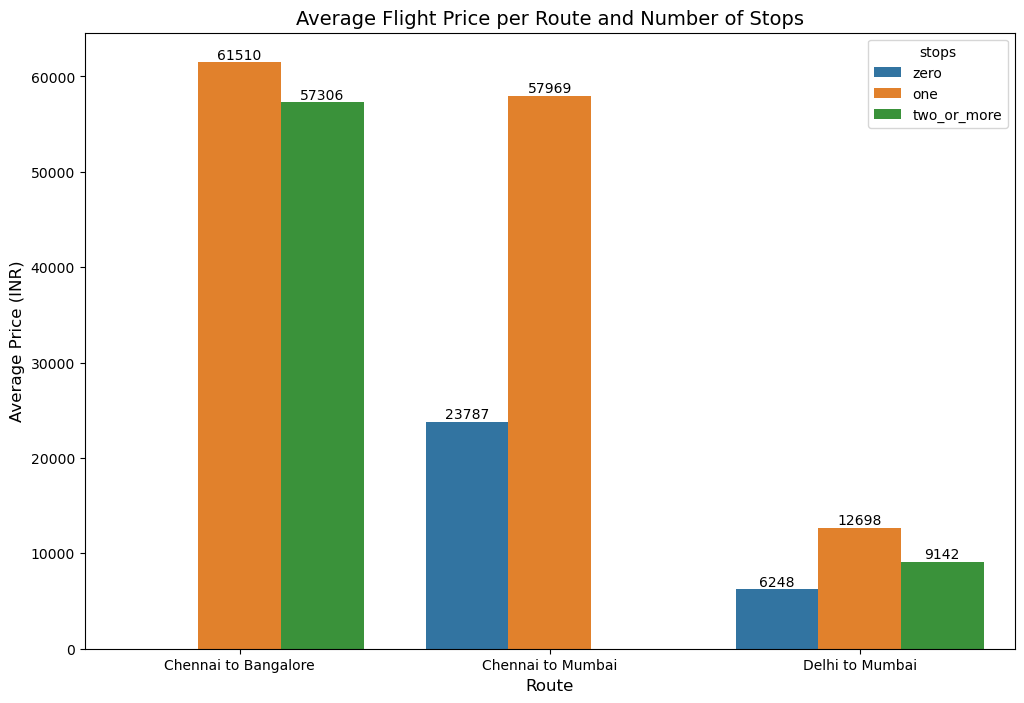

In [34]:
# Bar plot: Average Flight Price per Route and Number of Stops
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=duration_price_table, x='route', y='price', hue='stops')

# Adding average price labels on top of each bar
for p in barplot.patches:
    height = int(p.get_height())
    if height > 0:
        barplot.annotate(f'{height}', 
                         (p.get_x() + p.get_width() / 2, height), 
                         ha='center', va='bottom', 
                         fontsize=10, color='black')

# Adding title and labels
plt.title('Average Flight Price per Route and Number of Stops', fontsize=14)
plt.xlabel('Route', fontsize=12)
plt.ylabel('Average Price (INR)', fontsize=12)

# Display the plot
plt.show()

### Insights from the Average Flight Price per Route and Number of Stops plot
Direct flights are typically the most economical, but route-specific factors influence the relationship between stops and price.

#### 1. Impact of Stops on Prices:
- Direct flights (zero stops) are generally the cheapest across most routes.
- Flights with one stop tend to be more expensive compared to those with two or more stops.

#### 2. Route-Based Price Variation:
- The Chennai to Bangalore route has the highest average price, especially for one-stop flights (61,511 INR).
- In contrast, the Delhi to Mumbai route has lower prices, with direct flights averaging around 6,248 INR.

#### 3. Stops Comparison:
- On some routes (e.g., Chennai to Bangalore), flights with two or more stops are priced lower than one-stop flights, possibly due to lower demand for multi-stop journeys.

## Figure 2: Price Comparison by Airline per Route

In [37]:
# Prepare the table with statistical summary per airline and route combination
airline_stop_stats = df_cleaned.groupby(['airline', 'route'])['price'].agg(['mean', 'median', 'std', 'min', 'max', 'count']).dropna().reset_index()

# Round the numerical columns for better readability
airline_stop_stats[['mean', 'median', 'std', 'min', 'max']] = airline_stop_stats[['mean', 'median', 'std', 'min', 'max']].round(2)

# Display the statistical summary table
print("Price Comparison by Airline per Route - Statistical Summary")
display(airline_stop_stats)

Price Comparison by Airline per Route - Statistical Summary


,airline,route,mean,median,std,min,max,count
0,AirAsia,Delhi to Mumbai,9122.24,6139.0,5247.07,5949,29501,37
1,Air_India,Chennai to Bangalore,59851.84,65309.0,7326.45,45905,65309,25
2,Air_India,Chennai to Mumbai,47880.25,49553.0,8445.34,23424,70109,789
3,Air_India,Delhi to Mumbai,13130.21,12360.0,5059.73,5955,31260,409
4,GO_FIRST,Delhi to Mumbai,9017.57,5954.0,4546.69,5954,23685,187
5,Indigo,Delhi to Mumbai,8883.60,7583.0,3130.25,5955,15720,225
6,SpiceJet,Delhi to Mumbai,7720.90,5955.0,3141.99,5953,19464,105
7,Vistara,Chennai to Bangalore,62888.38,62209.0,10148.15,50113,73812,24
8,Vistara,Chennai to Mumbai,59520.21,61873.0,14890.65,23838,93200,1232
9,Vistara,Delhi to Mumbai,11758.53,12150.0,4152.43,5955,29160,505


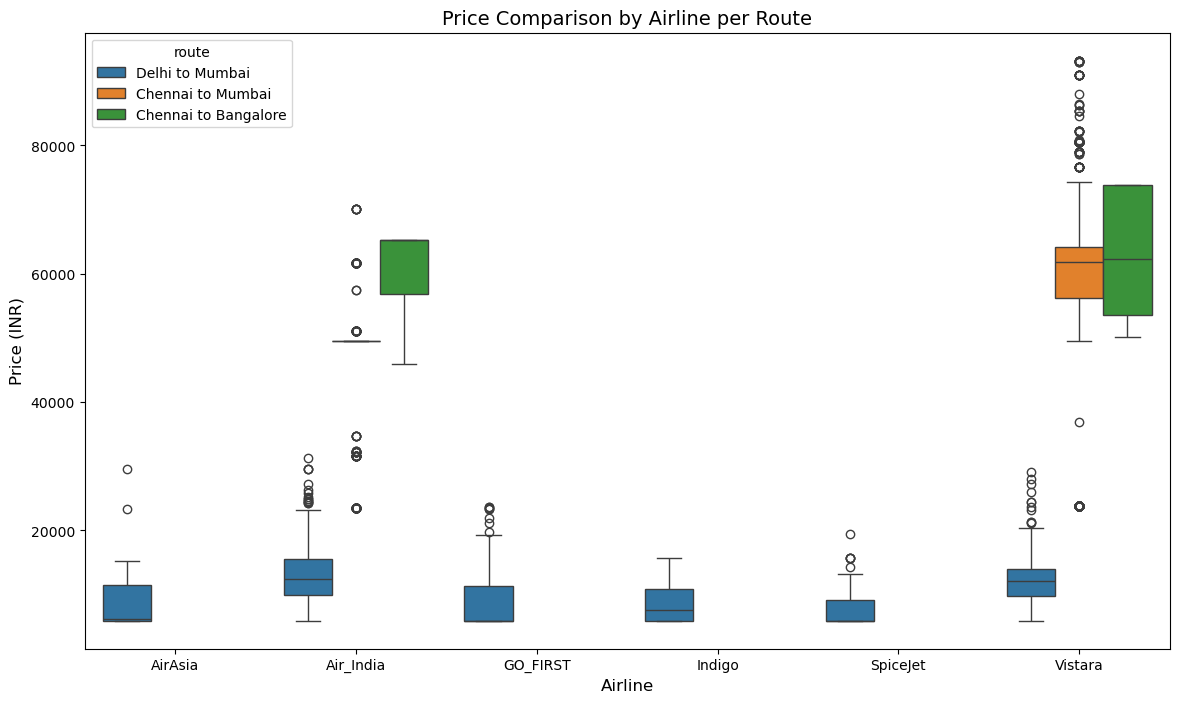

In [38]:
# Boxplot: Price Comparison by Airline per Route
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_cleaned.sort_values('airline'), x='airline', y='price', hue='route')

# Adding title and labels
plt.title('Price Comparison by Airline per Route', fontsize=14)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Price (INR)', fontsize=12)

# Display the plot
plt.show()

### Insights from the Price Comparison by Airline per Route plot
Airline choice significantly affects flight prices, with Vistara being consistently more expensive. Route differences also play a major role, highlighting the need for route-specific pricing strategies.

#### 1. Price Variation by Airline:
- Vistara has the highest price range across most routes, especially for Chennai to Bangalore.
- SpiceJet and Indigo offer lower average prices compared to other airlines on the Delhi to Mumbai route.

#### 2. Route-Based Differences:
- The Chennai to Bangalore route generally has higher prices, particularly with Vistara and Air India.
- In contrast, the Delhi to Mumbai route shows lower price ranges, especially with Indigo, SpiceJet, and GO_FIRST.

#### 3. Price Distribution:
- Some airlines (like Vistara) exhibit wide price variability, while others (like SpiceJet) show more consistent pricing.
- Outliers are present, particularly in Vistara flights, indicating that premium services or last-minute bookings could be driving higher prices.

### Figure 3: Average Price by Days Left per Route

In [41]:
# Group the data by route and days left, then calculate average price
avg_price_by_route_days = df_cleaned.groupby(['route', 'days_left'])['price'].mean().reset_index()

# Create bins for days left (1-5, 6-10, ..., 46-50)
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50']

# Categorise 'days_left' into bins
df_cleaned['days_bin'] = pd.cut(df_cleaned['days_left'], bins=bins, labels=labels, right=False)

# Grouping and aggregating data to create a statistical summary table
line_stats_table = df_cleaned.groupby(['days_bin', 'route'], observed=False)['price'].agg(['mean', 'median', 'min', 'max']).unstack().fillna('-')
print("Line Plot (Price by Days Left) - Statistical Summary per Route")
print(line_stats_table)

Line Plot (Price by Days Left) - Statistical Summary per Route
                         mean                                    \
route    Chennai to Bangalore Chennai to Mumbai Delhi to Mumbai   
days_bin                                                          
1-5              61339.122449                 -    12145.273535   
6-10                        -                 -    10304.524444   
11-15                       -                 -          5953.6   
16-20                       -      58748.742857               -   
21-25                       -      55734.183735               -   
26-30                       -      54646.160121               -   
31-35                       -       54260.41994               -   
36-40                       -      54565.235821               -   
41-45                       -       54878.31307               -   
46-50                       -      54463.790698               -   

                       median                                    

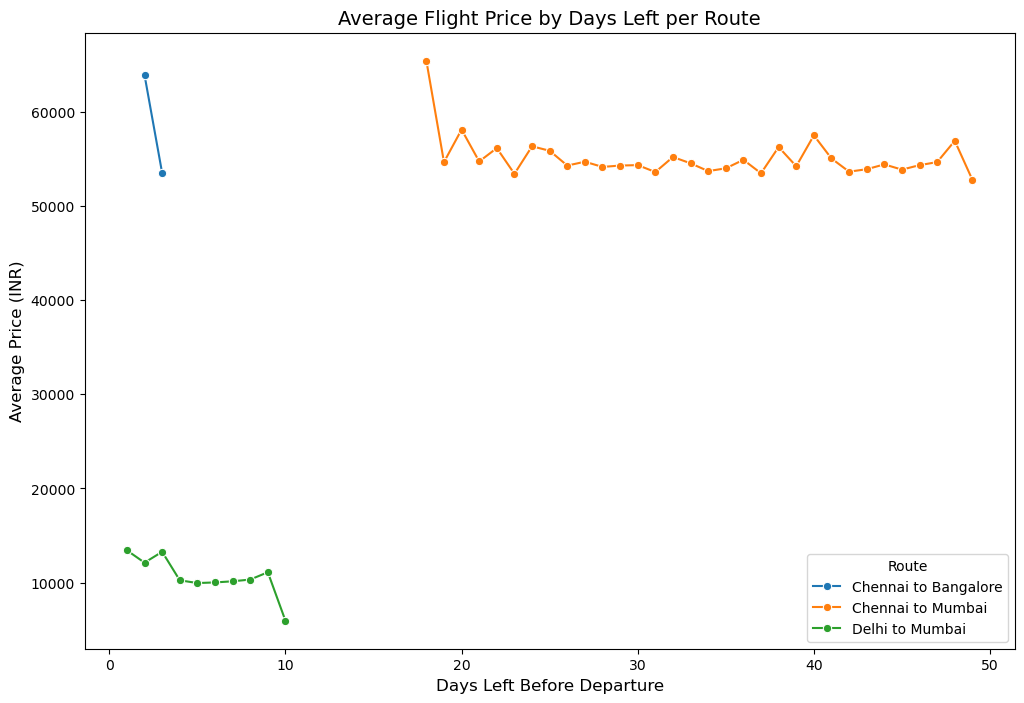

In [124]:
# Line plot: Average Price by Days Left per Route
plt.figure(figsize=(12, 8))
sns.lineplot(data=avg_price_by_route_days, x='days_left', y='price', hue='route', marker='o')

# Adding title and labels
plt.title('Average Flight Price by Days Left per Route', fontsize=14)
plt.xlabel('Days Left Before Departure', fontsize=12)
plt.ylabel('Average Price (INR)', fontsize=12)
plt.legend(title='Route', loc='lower right')

# Display the plot
plt.show()

### Insights from the Average Price by Days Left per Route plot
Prices increase significantly as departure date approaches, especially for popular routes like Chennai to Bangalore. Early booking is recommended to minimize flight costs.

#### 1. General Trend:
- As the number of days left before departure decreases, the average flight price increases.
- This trend is most evident for the Chennai to Bangalore and Delhi to Mumbai routes.

#### 2. Route-Specific Observations:
- Delhi to Mumbai shows a sharp price increase in the last few days before departure.
- Chennai to Mumbai maintains a high average price throughout, with minimal variation.
- Chennai to Bangalore has the highest price increase when booking closer to the departure date.

#### 3. Booking Window Impact:
- Booking 1-5 days before departure results in significantly higher prices compared to booking more than 15 days in advance.
- The price difference highlights the importance of early booking for cost savings.

---

# Question 3

## Modelling Approach Explanation:
### Objective:
The primary goal of this linear regression model is to predict flight prices based on various features from the dataset.

### Why Linear Regression?
- Linear regression is ideal for understanding linear relationships between variables, which is useful when exploring how features like duration, stops, and airline type impact price.
- Additionally, it provides interpretability by giving direct coefficients for each feature, showing their influence on the predicted price.
- Although effective, linear regression may have limitations, especially when the data contains non-linear patterns or outliers.

### Steps Taken:
#### 1. Exploratory Data Analysis (EDA):
- Objective: Understand the relationships between variables.
- Visuals: Correlation matrix, heatmap, pairplot.

#### 2. Data Preprocessing:
- Objective: Prepare data for modelling.

Steps:
1. Encode categorical variables.
2. Scale numerical variables.
3. Split data into training and testing sets.

#### 3. Linear Regression Modelling:
- Objective: Predict flight prices using linear regression.
- Visuals: Residual plot, predictions vs. actual plot.

Steps:
1. Train model on separate data to avoid overfitting.
2. Fit the model on the training data.
3. Predict on the test data.
4. Calculate R-squared and MAE.

---

### Step 1: Exploratory Data Analysis (EDA)
We started by examining the relationships between numerical variables using a correlation matrix and heatmap to identify potential correlations. Additionally, pairplots were utilised to visually assess the distribution and interactions between variables.

#### 1.1 Correlation Matrix:
- Helps identify relationships between price, duration, and days left.
- Values closer to 1 or -1 indicate stronger relationships.
- Values near 0 indicate weak or no relationship.

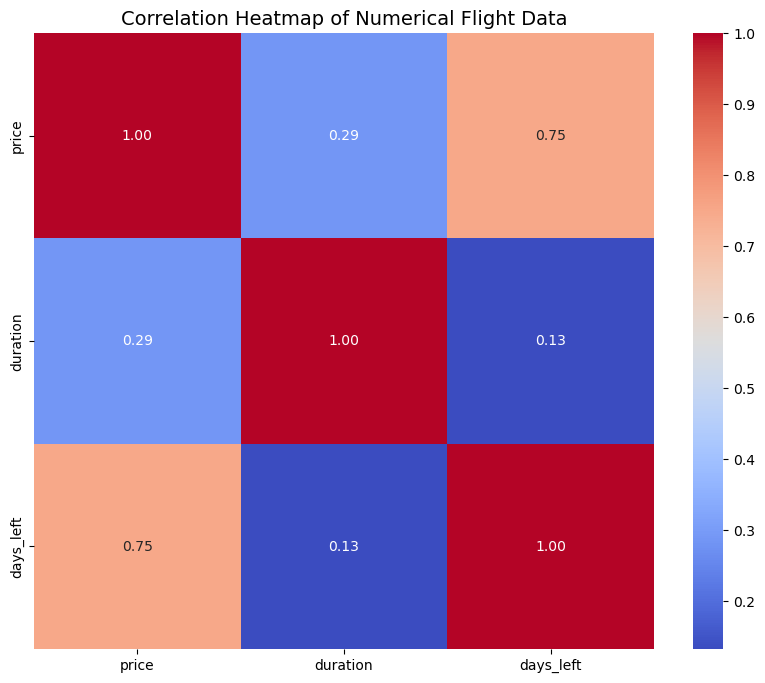

In [50]:
# Correlation Matrix - Understand Relationships
numerical_cols = ['price', 'duration', 'days_left']

# Calculate the correlation matrix for numerical columns
correlation_matrix = df_cleaned[numerical_cols].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Flight Data", fontsize=14)
plt.show()

#### 1.2 Pairplot:
- Visualizes pairwise relationships between numerical variables.
- Helps identify patterns or clusters that might indicate correlations.

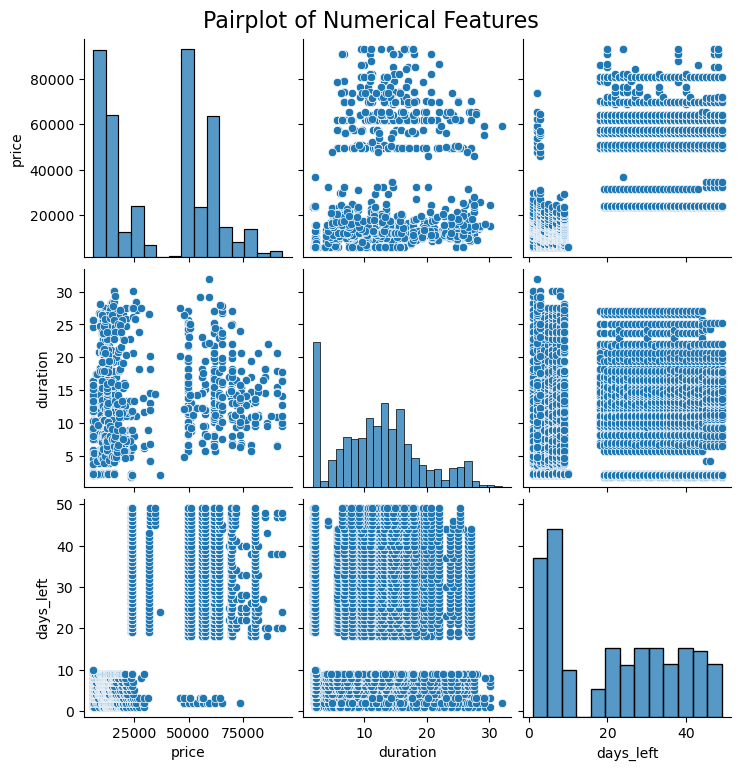

In [52]:
# Pairplot - Visualize Interactions
sns.pairplot(df_cleaned[numerical_cols])
plt.suptitle("Pairplot of Numerical Features", y=1.02, fontsize=16)
plt.show()

---

### Step 2: Data Preprocessing

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

### 2.1 Encode categorical variables:
- Categorical data (like airline, city, stops) must be converted to numerical form to fit in a mathematical model.
- Uses OneHotEncoder to convert categories into binary columns.

In [57]:
# Encoding Categorical Variables
categorical_cols = ['airline', 'source_city', 'destination_city', 'stops', 'class']
numerical_cols = ['duration', 'days_left']

# Column transformer to encode categorical features and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

### 2.2 Scaling Numerical Variables:
- Uses StandardScaler to normalize the range of numerical features (duration, days_left) for consistent model performance.

In [59]:
# Prepare features and target variable
X = df_cleaned[categorical_cols + numerical_cols]
y = df_cleaned['price']

### 2.3 Train-Test Split:
- Divides data into training (80%) and testing (20%) sets.
- Ensures the model is trained and evaluated on separate data for unbiased performance measurement.

In [61]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

### Step 3: Linear Regression Modelling

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

#### 3.1 Model Fitting:
- Trains a Linear Regression model using the preprocessed training data.
- Uses a pipeline to streamline preprocessing and modelling in one step.

In [66]:
# Fit the Linear Regression model
model = make_pipeline(preprocessor, LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['airline', 'source_city',
                                                   'destination_city', 'stops',
                                                   'class']),
                                                 ('num', StandardScaler(),
                                                  ['duration', 'days_left'])])),
                ('linearregression', LinearRegression())])

#### 3.2 Model Prediction:
- Predicts flight prices on the test data.
- Measures how well the model generalizes to unseen data.

In [68]:
# Predict on the test data
y_pred = model.predict(X_test)

#### 3.3 Model Evaluation:
- R-squared: Measures the proportion of variance explained by the model.
  - Closer to 1 indicates a better fit.
- Mean Absolute Error (MAE): Indicates the average error between predicted and actual prices.
  - Lower values indicate more accurate predictions.

In [70]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R-squared: 0.8895
Mean Absolute Error (MAE): 6162.98


#### 3.4 Predicted vs Actual Plot:
- Compares predicted prices to actual prices.
- Ideal line indicates perfect predictions.
- Points close to the line indicate accurate predictions.

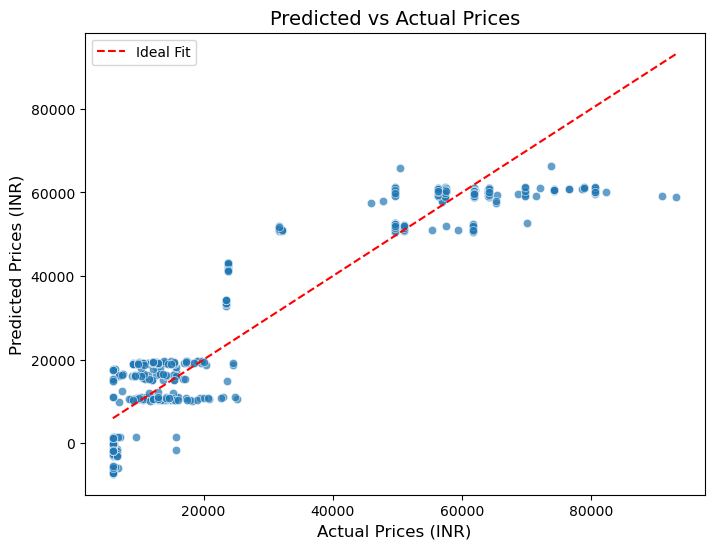

In [72]:
# Predictions vs. Actual Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.title("Predicted vs Actual Prices", fontsize=14)
plt.xlabel("Actual Prices (INR)", fontsize=12)
plt.ylabel("Predicted Prices (INR)", fontsize=12)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Fit")
plt.legend()
plt.show()

#### 3.5 Residual Plot:
- Shows the distribution of errors (differences between actual and predicted prices).
- Should resemble a normal distribution if the model is accurate and unbiased.

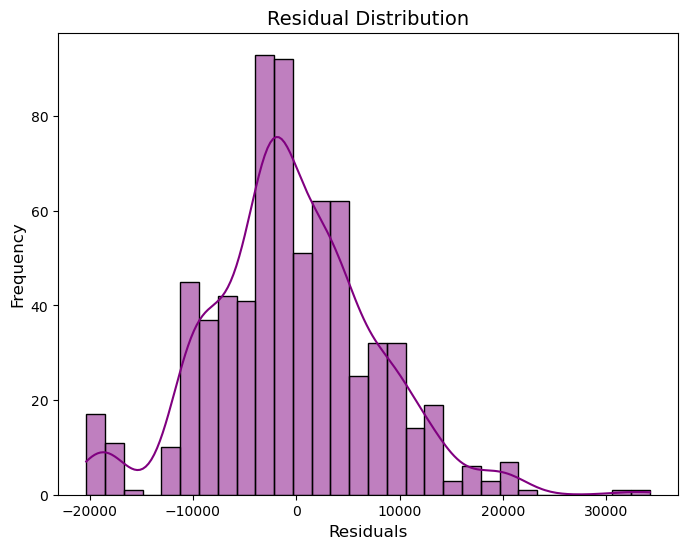

In [74]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title("Residual Distribution", fontsize=14)
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

---

# Question 4

## Evaluate Model's Performance
We will use R-squared (R²) and Mean Absolute Error (MAE) to evaluate the model’s performance:
- R-squared (R²) indicates how well the model explains the variability of the target variable. The R-squared value of 0.8895 indicates that approximately 88.95% of the variation in flight prices is explained by the model.
- MAE provides the average magnitude of errors in the model's predictions. The MAE of 6162.98 INR suggests that the model's predictions, on average, differ from the actual prices by around 6163 INR.

## Linear Regression Equation

### General Linear Regression Equation
The general equation of the linear regression model is:

$$ Y = a + bX $$

Where:
- $Y$ = Predicted flight price  
- $a$ = Intercept ($\beta _0$)
- $b$ = Coefficient (slope) ($\beta _i$)
- $X$ = Predictor variable  

### Linear Regression Equation for Flight Price
Since the model has multiple variable, we extend the equation as follows:

$$ \text{Price} = \beta _0 + \sum_{i=1}^{n} \beta _i \cdot X_i $$

Where:
- $\text{Price}$ = Predicted flight price
- $\beta _0$ = Intercept
- $\beta _i$ = Coefficient of the $i^\text{th}$ feature
- $X_i$ = Value of the $i^\text{th}$ feature
- $n$ = Number of features

In [81]:
# Extract the linear regression model from the pipeline
linear_model = model.named_steps['linearregression']

# Get the intercept and coefficients
intercept = linear_model.intercept_
coefficients = linear_model.coef_

# Get feature names after transformation
feature_names = model.named_steps['columntransformer'].get_feature_names_out()

# Combine feature names and coefficients into a DataFrame
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the intercept and coefficients
print(f"Intercept (β0): {intercept:.2f}")
print("\nLinear Regression Coefficients:")
print(coef_df)

Intercept (β0): 57957.84

Linear Regression Coefficients:
                         Feature   Coefficient
0         cat__airline_Air_India -1.508452e+03
1          cat__airline_GO_FIRST  2.884422e+03
2            cat__airline_Indigo  3.908771e+03
3          cat__airline_SpiceJet  5.439418e+03
4           cat__airline_Vistara  6.932910e+03
5         cat__source_city_Delhi -4.945864e+16
6   cat__destination_city_Mumbai -3.945684e+03
7         cat__stops_two_or_more -6.282242e+03
8                cat__stops_zero -1.817989e+04
9             cat__class_Economy  4.945864e+16
10                 num__duration -1.485141e+02
11                num__days_left -1.061390e+03


### Example of Resulting Equation
Plugging in the given variables from our model:

$$
\text{Price} = 57957.84 - 49458640000000000 \cdot \text{Delhi} + 49458640000000000 \cdot \text{Economy} - 18179.89 \cdot \text{zero stops} + 6932.91 \cdot \text{Vistara} - 6282.24 \cdot \text{two or more stops} + 5439.42 \cdot \text{SpiceJet} - 3945.68 \cdot \text{Mumbai} + 3908.77 \cdot \text{Indigo} + 2884.42 \cdot \text{GO\_FIRST} - 1508.45 \cdot \text{Air\_India} - 1061.39 \cdot \text{days\_left} - 148.51 \cdot \text{duration}
$$

In this equation:
- $\beta _0$ = 57957.84 (intercept)
- $\beta _i$ are the coefficients for each $X_i$ (value of the $i^\text{th}$ feature)
- Each coefficient represents the change in flight price for a one-unit change in the corresponding predictor variable while keeping other variables constant

## Insights from the Plots and Linear Regression Equation

### Insights from the Plots

#### Predicted vs. Actual Prices Plot:
- The scatter plot shows that most points follow the diagonal line, indicating good predictions.
- Some deviations, especially for high-priced flights, suggest underestimation.

#### Residual Distribution Plot:
- The residuals are approximately normally distributed, which is desirable.
- There is a slight right skew, indicating that the model underestimates high prices.
- The majority of residuals cluster around zero, indicating that the model’s predictions are generally accurate.

### Insights from the Linear Regression Equation:

#### Intercept ($\beta _0$):
- The intercept ($\beta _0$) value is approximately 57,957.84 INR.
- This means that if all features are equal to zero, the predicted base price of a flight would be around 57,958 INR.
- However, since most of the features are categorical and encoded, this intercept serves as a reference point rather than an actual prediction for any flight.
- It indicates the baseline price when none of the encoded features (like specific airlines, cities, number of stops) are activated.

#### Coefficients ($\beta _i$):
**1. Airline Features:**
- Air_India: -1508 INR
- GO_FIRST: +2884 INR
- Indigo: +3909 INR
- SpiceJet: +5439 INR
- Vistara: +6933 INR

*Insight:*
- The positive coefficients for GO_FIRST, Indigo, SpiceJet, and Vistara suggest that these airlines are associated with higher flight prices compared to the baseline airline.
- Among these, Vistara has the highest positive impact, meaning flights operated by Vistara tend to be the most expensive among the listed airlines.
- In contrast, Air_India has a negative coefficient, indicating that its flights are generally cheaper compared to the baseline.

**2. City Features:**
- Source City - Delhi: -4.94e+16
- Destination City - Mumbai: -3945 INR

*Insight:*
- The very large negative coefficient for Delhi is likely due to multi-collinearity or data encoding issues. This value is unreasonably large, indicating that there might be a problem with how the categorical features are encoded.
- On the other hand, the negative coefficient for Mumbai indicates that flights to Mumbai are generally cheaper compared to other destinations.
- This issue requires further investigation, as the magnitude of the coefficient for Delhi is not reasonable.

**3. Number of Stops:**
- Two_or_more stops: -6282 INR
- Zero stops: -18180 INR

*Insight:*
- Both coefficients are negative, indicating that non-stop flights and flights with two or more stops are generally cheaper compared to one-stop flights (which acts as the baseline).
- Zero stops (direct flights) have a significantly larger negative impact compared to flights with two or more stops. This could mean that direct flights are typically priced lower compared to connecting flights with one stop.
- However, this insight contradicts typical airline pricing trends, where direct flights are usually more expensive. This may indicate a data inconsistency or bias in the dataset.

**4. Class Feature:**
- Economy Class: +4.94e+16

*Insight:*
- Similar to the Delhi coefficient, the very large positive coefficient for Economy suggests a problem with data encoding or multi-collinearity.
- Typically, Economy class flights are expected to be cheaper compared to Business class, but the coefficient here does not reflect that.
- This could be an indication that the model is not correctly interpreting the class information, possibly due to how the categorical encoding was handled.

**5. Numerical Features:**
- Duration: -148.51 INR
- Days Left: -1061.39 INR

*Insight:*
- The negative coefficient for duration means that longer flight durations are associated with slightly lower prices, which might make sense if long-haul flights with more layovers are priced lower.
- The negative coefficient for days left suggests that the closer the departure date, the higher the price, which aligns with typical flight pricing trends.

---

# Question 5

## Limitations

### 1. Assumption of Linearity: 
Linear regression assumes a linear relationship between the independent variables and the target variable (price). However, real-world data, especially in the context of flight pricing, often exhibits non-linear patterns due to factors like seasonal demand, route popularity, and airline-specific pricing strategies.

### 2. Multicollinearity Issues: 
The presence of highly correlated independent variables can distort the model's interpretation. Although one-hot encoding and scaling help address this, residual multicollinearity may still affect the model's accuracy.

### 3. Sensitivity to Outliers: 
Linear regression is highly sensitive to outliers, which can disproportionately influence the model parameters, leading to skewed predictions. Despite our efforts to remove outliers, the dynamic nature of flight prices means that outliers may still appear, especially in cases of sudden promotions or last-minute bookings.

### 4. Limited Handling of Categorical Variables: 
Although we applied one-hot encoding, the linear regression model may not fully capture the complex relationships between categorical variables like airlines and flight classes.

## Suggested Alternative Models and Approaches

### 1. Decision Trees and Random Forests: 
These models can capture non-linear relationships and interactions between variables, making them more suitable for complex datasets like flight prices. Random forests, in particular, can improve generalization and reduce overfitting.

### 2. Gradient Boosting Models (e.g., XGBoost): 
These ensemble methods are more robust to outliers and can model non-linear relationships effectively, offering higher predictive accuracy compared to linear models.

### 3. Clustering Techniques (e.g., K-Means): 
Grouping flights based on similar characteristics (e.g., route, class, and airline) before prediction can enhance model accuracy by reducing variability within clusters.

### 4. Neural Networks: 
Deep learning models can capture highly complex and non-linear relationships, especially useful when the dataset is large and exhibits intricate patterns.

---

## References  

- **Chew Jee Loong. (2025).** *ANL252 Python for Data Analytics: Lecture Notes*. Singapore University of Social Sciences.
- **DataCamp.** *Python for Data Science and Machine Learning.* Available at: [https://www.datacamp.com](https://www.datacamp.com)
- **Flight Price Dataset (ECA_flight.csv).** Provided by the Singapore University of Social Sciences.
- **Scikit-learn Documentation.** *Machine Learning in Python.* Available at: [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)
- **Seaborn Documentation.** *Statistical Data Visualization.* Available at: [https://seaborn.pydata.org](https://seaborn.pydata.org)
- **Singapore University of Social Sciences (SUSS). (2025).** *ANL252 Course Materials (Study Units 1 to 6).*
- **W3Schools.** *Python and Data Science Tutorials.* Available at: [https://www.w3schools.com](https://www.w3schools.com)
- **Zulhilmie, M. (2025).** *SUSS-Data-Analytics-GBA* [GitHub Repository]. Available at: [https://github.com/mdzoul/SUSS-Data-Analytics-GBA](https://github.com/mdzoul/SUSS-Data-Analytics-GBA)
- **Zulhilmie, M. (2025).** *Vertical-Institute-Data-Science-Capstone-Project* [GitHub Repository]. Available at: [https://github.com/mdzoul/Vertical-Institute-Data-Science-Capstone-Project](https://github.com/mdzoul/Vertical-Institute-Data-Science-Capstone-Project)